In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from matplotlib import colormaps
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import numpy as np

In [ ]:
# Load the MIF/MID file

map_data = gpd.read_file('/scratch/ed2189/JMP/maps/bta.mif')

# Load the winner data and merge it into the GeoDataFrame
bta_data = pd.read_csv('/scratch/ed2189/JMP/datasets/bta_data.csv')
map_data['winner'] = bta_data['winner']
map_data['bidder_num_fox'] = bta_data['bidder_num_fox']

# Bidder data
bidder_data = pd.read_csv('/scratch/ed2189/JMP/datasets/bidder_data.csv')

bidder_data.loc[bidder_data['City'] == 'Betheseda', 'City'] = 'Bethesda'



# Merge on 'bidder_num_fox' from both DataFrames
map_data = map_data.merge(
                            bidder_data[['bidder_num_fox', 'City', 'State']],
                            on='bidder_num_fox',  
                            how='left'           
                        )


# Reorder rows of map_data by frequency of 'winner'
winner_counts = map_data['winner'].value_counts()
# least_frequent = winner_counts[winner_counts < 7].index.tolist()
# least_frequent = winner_counts[20:].index.tolist()
# least_frequent = winner_counts[:20].index.tolist() + winner_counts[40:].index.tolist()
# least_frequent = winner_counts[:40].index.tolist() + winner_counts[60:].index.tolist()

packages_to_color =  winner_counts[20:].index.tolist()

map_data['winner_color'] = map_data['winner']
map_data.loc[map_data['winner'].isin(packages_to_color), 'winner_color'] = 'white'


# Define bounding box for continental US (roughly)
minx, miny, maxx, maxy = -125, 24, -66, 50
continental_us = map_data.cx[minx:maxx, miny:maxy]

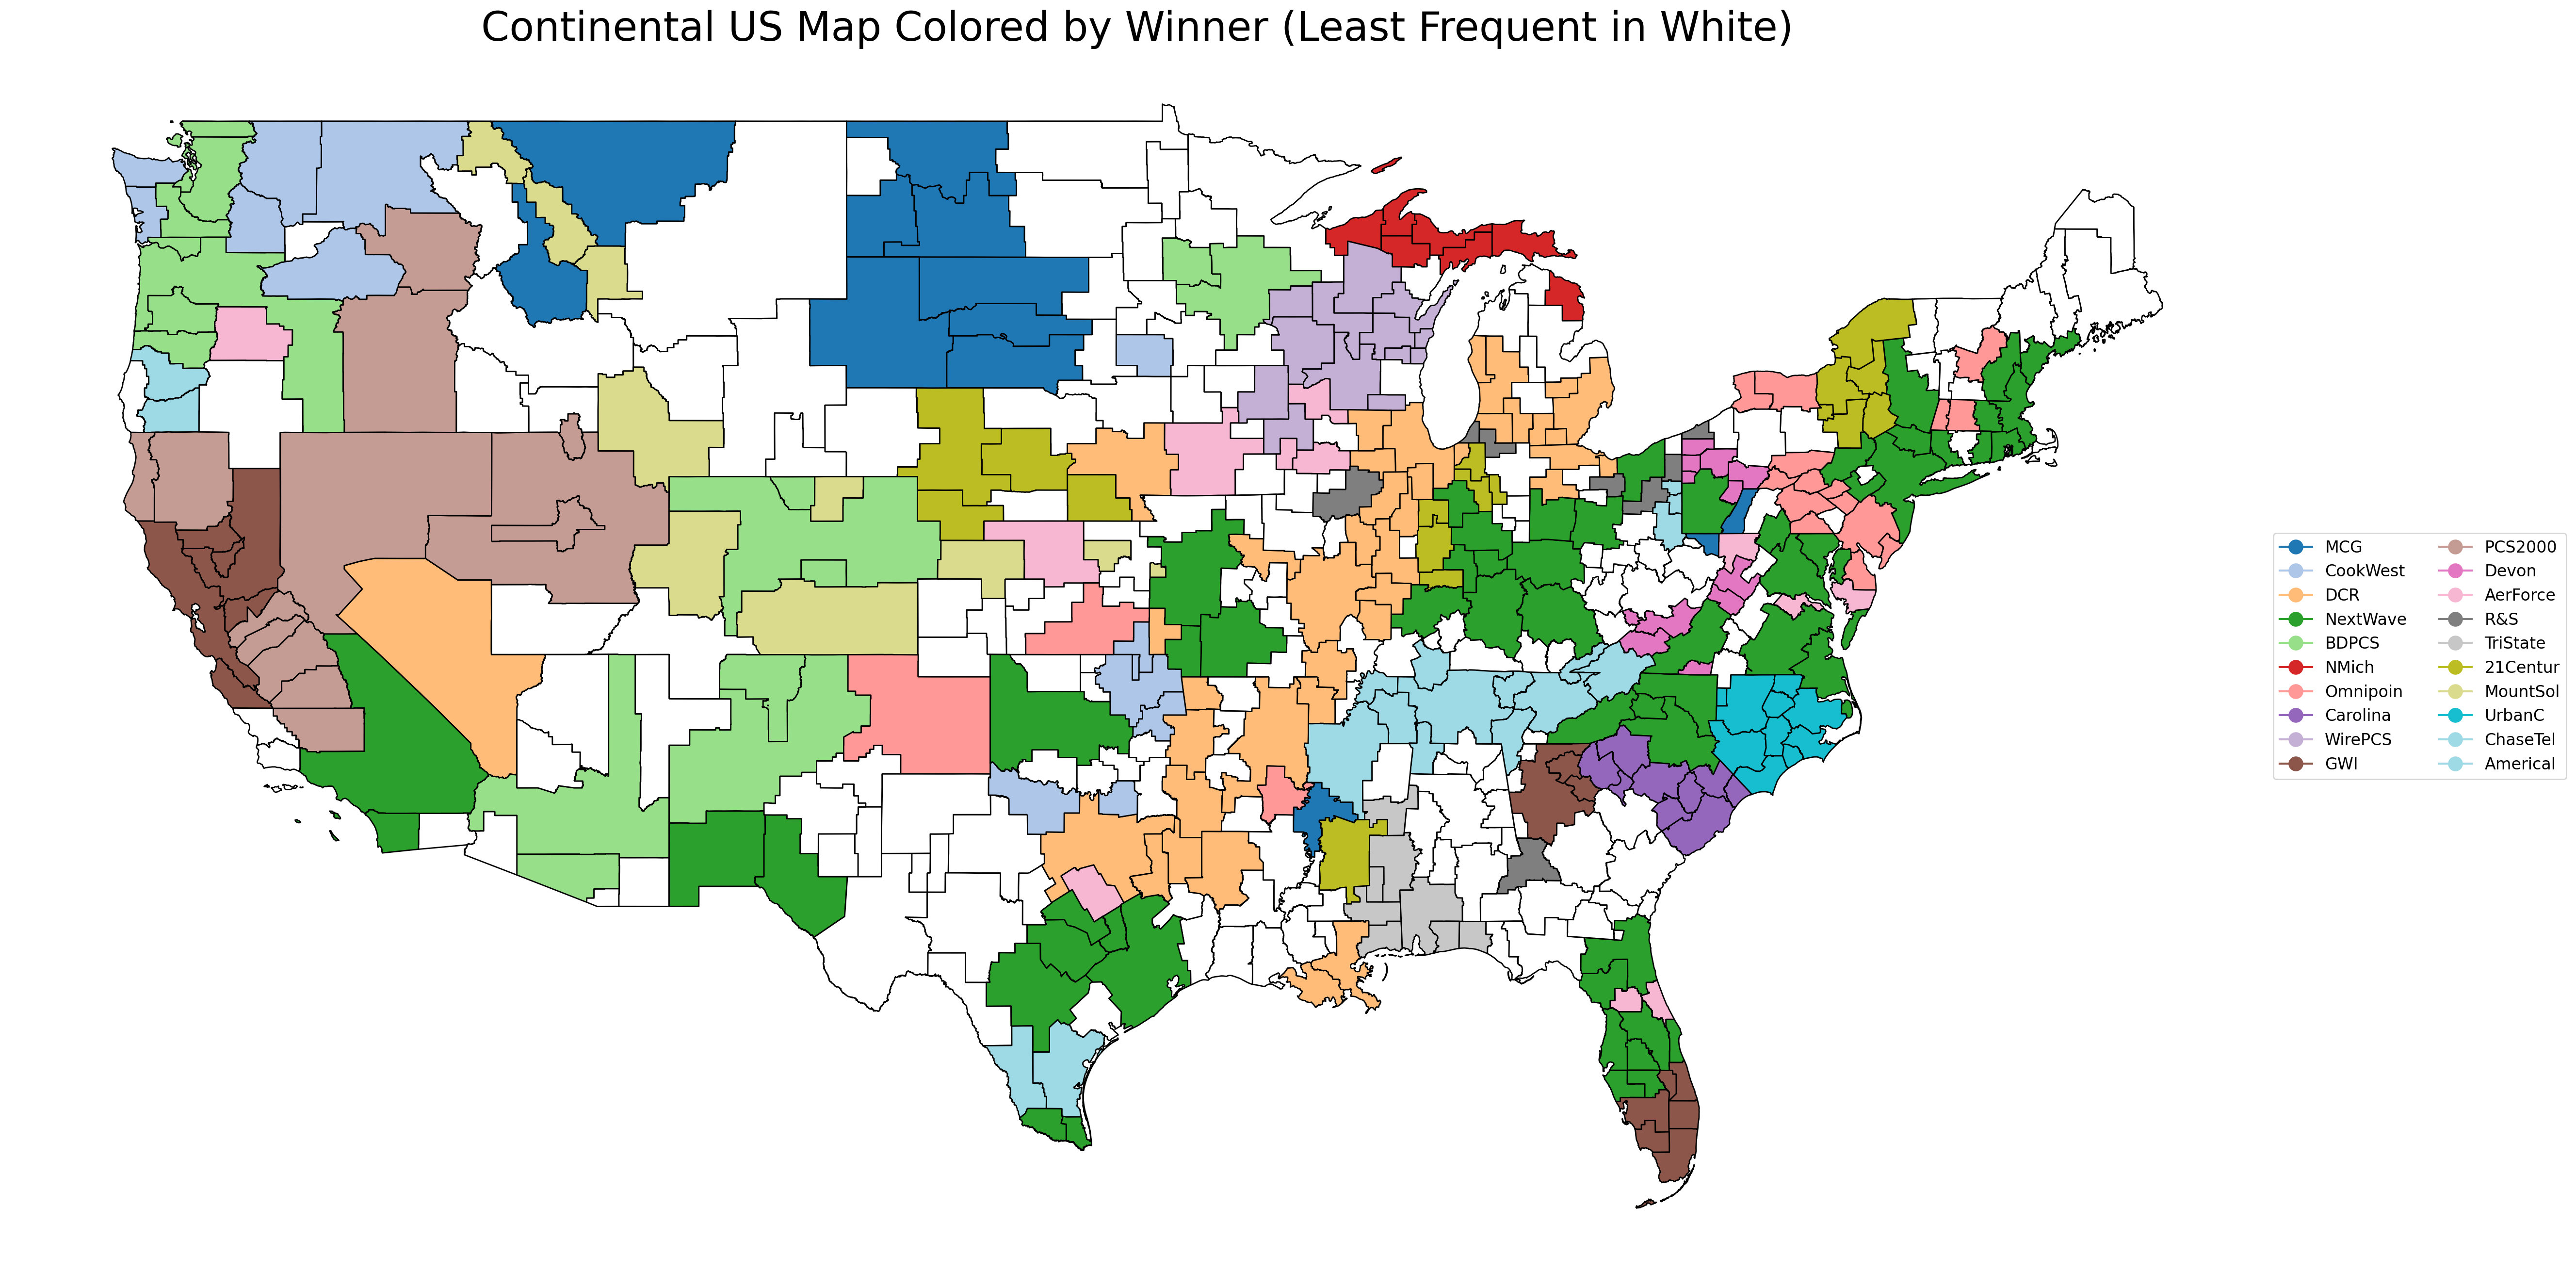

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(30, 20), dpi=200)

# Assign distinct colors for other winners using a colormap
unique_winners = continental_us['winner_color'].unique()
color_map = {winner: 'white' if winner == 'white' else colormaps['tab20'](i / (len(unique_winners) - 1))
             for i, winner in enumerate(unique_winners)}
colors = continental_us['winner_color'].map(color_map)

# Plot the data
continental_us.plot(color=colors, edgecolor="black", ax=ax)

# Custom legend for colored winners only
colored_winners = [winner for winner in unique_winners if winner != 'white']
legend_labels = [Line2D([0], [0], marker='o', color=color_map[winner], markersize=10) for winner in colored_winners]
legend = ax.legend(legend_labels, colored_winners, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fontsize=12)

# Remove axes and add a title
ax.axis("off")
plt.title("Continental US Map Colored by Winner (Least Frequent in White)", fontsize=30)
plt.show()

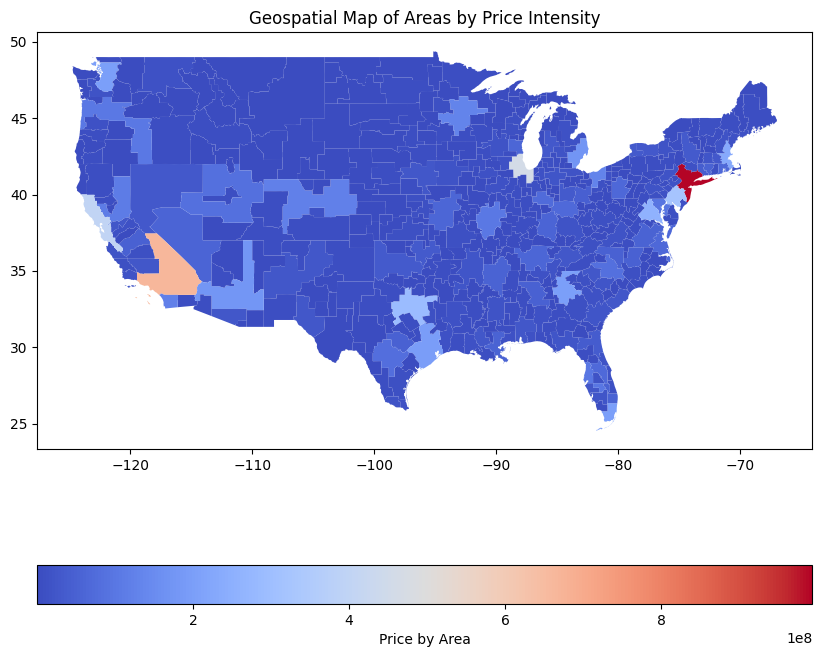

In [ ]:
map_data['price'] = bta_data['bid']
# map_data['log_price'] = map_data['price'].apply(lambda x: 0 if x == 0 else np.log10(x))

map_data['price_normalized'] = map_data['price'] / map_data['price'].max() 
map_data['log_price'] = map_data['price_normalized'].apply(lambda x: 0 if x == 0 else np.log10(x))


continental_us = map_data.cx[minx:maxx, miny:maxy]

fig, ax = plt.subplots(figsize=(10, 10))
# Plot the GeoDataFrame with color intensity based on price
continental_us.plot(column='price', ax=ax, legend=True, 
              legend_kwds={'label': "Price by Area", 'orientation': "horizontal"}, 
              cmap='coolwarm')

# Set the title
ax.set_title('Geospatial Map of Areas by Price Intensity')

# Display the plot
plt.show()

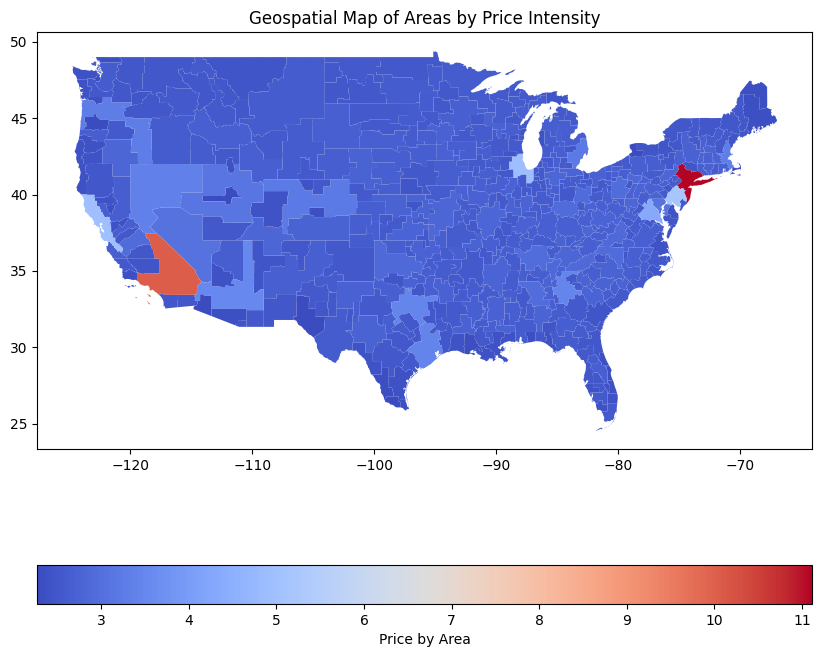

In [ ]:
solution_v1_100 = np.load('/scratch/ed2189/JMP/GMM_quad_v1-100/output/solution_master_pb.npy')
price_j = solution_v1_100[-493:]

map_data['model_price'] = price_j
map_data['model_price_normalized'] = map_data['model_price'] / map_data['model_price'].max()

map_data['model_log_price'] = map_data['model_price_normalized'].apply(lambda x:  np.log10(x))
continental_us = map_data.cx[minx:maxx, miny:maxy]

fig, ax = plt.subplots(figsize=(10, 10))
# Plot the GeoDataFrame with color intensity based on price
continental_us.plot(column='model_price', ax=ax, legend=True, 
              legend_kwds={'label': "Price by Area", 'orientation': "horizontal"}, 
              cmap='coolwarm')

# Set the title
ax.set_title('Geospatial Map of Areas by Price Intensity')

# Display the plot
plt.show()
